Des tests de scalabilité avec  100  %
Matrice de confusion
[[33  0  3  1  1  0  0  0]
 [ 0  0  1  0  2  0  0  0]
 [ 1  1  6  0  6  0  2  0]
 [ 0  0  2  0  0  0  0  0]
 [ 2  2  2  0  5  0  2  0]
 [ 0  0  1  0  0  0  1  0]
 [ 1  1  1  0  2  0 20  0]
 [ 0  0  0  0  0  0  1  0]]
Matrice de classification
             precision    recall  f1-score   support

          0       0.89      0.87      0.88        38
          1       0.00      0.00      0.00         3
          2       0.38      0.38      0.38        16
          3       0.00      0.00      0.00         2
          4       0.31      0.38      0.34        13
          5       0.00      0.00      0.00         2
          6       0.77      0.80      0.78        25
          7       0.00      0.00      0.00         1

avg / total       0.63      0.64      0.64       100

Des tests de scalabilité avec  80  %
Matrice de confusion
[[26  0  3  1  1  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 2  1  5  0  6  0  0  0]
 [ 0  0  2  0  0  0  0  0]

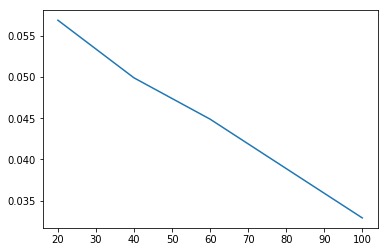

Courbe de prediction de temps


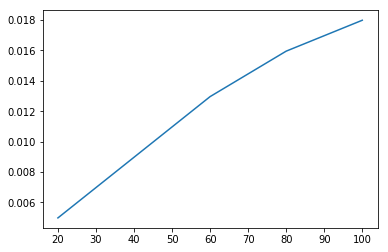

Courbe de scores


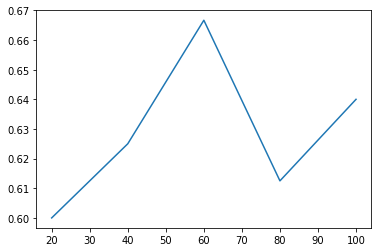

In [1]:
%matplotlib inline   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  
import numpy as np
import cv2 
from sklearn.preprocessing import MinMaxScaler
import glob 
import warnings
import sys
import random
import math
import scipy.io as spio
import time

X=[]
Y=[]


warnings.simplefilter('ignore')
np.set_printoptions(threshold=sys.maxsize )

imfilename = ['./EnsembleB/Cercles_2_F/*',
            './EnsembleB/Cercles_5_F/*',
             './EnsembleB/Hexagones_2_F/*',
             './EnsembleB/Hexagones_5_F/*',
             './EnsembleB/Losanges_2_F/*',
             './EnsembleB/Losanges_5_F/*',
             './EnsembleB/Triangles_2_F/*',
             './EnsembleB/Triangles_5_F/*']

yValue = [0,1,2,3,4,5,6,7]

y_cerles2f =    [1,0,0,0,0,0,0,0]
y_cerles5f =    [0,1,0,0,0,0,0,0]
y_hexagones2f = [0,0,1,0,0,0,0,0]
y_hexagones5f = [0,0,0,1,0,0,0,0]
y_losanges2f =  [0,0,0,0,1,0,0,0]
y_losanges5f =  [0,0,0,0,0,1,0,0]
y_triangles2f = [0,0,0,0,0,0,1,0]
y_triangles5f =  [0,0,0,0,0,0,0,1]

sc = MinMaxScaler(feature_range = (0, 1))

for i in range(0, len(imfilename)):
    for filename in glob.glob(imfilename[i]): 
        img = cv2.imread(filename,0)
        img = cv2.resize(img,(14,32))
        img = sc.fit_transform(img)
        X.append(np.ravel(img).tolist())
        Y.append(yValue[i])



#print(X)
#275x448
height, width = np.shape(X)

alpha=0.25
#number of images
m=height

rappelArray=[]
precisionArray=[]
timeTrainArray=[]
timePredictArray=[]

Taux_d_Prediction=[]
sizeArray=[100,80,60,40,20]

#Début du SVM
for size in sizeArray:
    print('Des tests de scalabilité avec ',size, ' %')
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = size, random_state=42)  

    scaler = StandardScaler()  
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test) 

    Svc_al=SVC(i,'linear')    
    t0 = time.time()
    # Apprentissage
    Svc_al.fit(X_train, y_train) 
    t1 = time.time()
    timeTrainArray.append(t1-t0)
        
    t0 = time.time()
    # Prediction
    predictions = Svc_al.predict(X_test)  
    
    # Calcule du score de prédiction
    Taux_d_Prediction.append(Svc_al.score(X_test,y_test))
    
    t1 = time.time()
    timePredictArray.append(t1-t0)
    print('Matrice de confusion')
    print(confusion_matrix(y_test,predictions))  
    
    print('Matrice de classification')
    print(classification_report(y_test,predictions))  
    
    #rappelArray.append()
    #precisionArray.append()
    
# les courbes de precision
#plt.plot(sizeArray,precisionArray)
#plt.show()

# Les courbes d'apprentissage temps
print('Courbe d\'apprentissage de temps')
plt.plot(sizeArray,timeTrainArray)
plt.show()

# Les courbes de predictions temps
print('Courbe de prediction de temps')
plt.plot(sizeArray,timePredictArray)
plt.show()

# Les courbes de scores
print('Courbe de scores')
plt.plot(sizeArray,Taux_d_Prediction)
plt.show()
